In [6]:
#import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

#import api key
from config import weather_api_key

#import the requests library
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)
#note: you can only unzip a zipped tuple once before it is removed from the computer's memory*

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
#create an empty list to hold the weather data
city_data = []

#print the beginning of the logging
print("Beginning of Data Retrieval     ")
print("--------------------------------")

#create counters
record_count = 1 
set_count = 1

#loop through all the cities in our list 
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if(i % 50 == 0 and i >=50 ):
        set_count += 1
        record_count = 1
        
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to the record count 
    record_count += 1 
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning of Data Retrieval     
--------------------------------
Processing Record 1 of Set 1 | shaghat
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | mount isa
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | puri
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | saint anthony
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | vostok
Processing Record 20 of Set 1 | lasa
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 

Processing Record 34 of Set 4 | salinopolis
Processing Record 35 of Set 4 | port hardy
Processing Record 36 of Set 4 | port macquarie
Processing Record 37 of Set 4 | bambous virieux
Processing Record 38 of Set 4 | pangnirtung
Processing Record 39 of Set 4 | sorland
Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 42 of Set 4 | general pico
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | gouyave
Processing Record 45 of Set 4 | hofn
Processing Record 46 of Set 4 | kamskoye ustye
Processing Record 47 of Set 4 | narva-joesuu
Processing Record 48 of Set 4 | sumbawa
City not found. Skipping...
Processing Record 49 of Set 4 | codrington
Processing Record 50 of Set 4 | satitoa
City not found. Skipping...
Processing Record 1 of Set 5 | faanui
Processing Record 2 of Set 5 | avarua
Processing Record 3 of Set 5 | zhuhai
Processing Record 4 of Set 5 | minas
Processing Record 5 of Set 5 | ball

Processing Record 21 of Set 8 | port hawkesbury
Processing Record 22 of Set 8 | macaubas
Processing Record 23 of Set 8 | isangel
Processing Record 24 of Set 8 | leningradskiy
Processing Record 25 of Set 8 | chuy
Processing Record 26 of Set 8 | tautira
Processing Record 27 of Set 8 | nuqui
Processing Record 28 of Set 8 | muzhi
Processing Record 29 of Set 8 | peniche
Processing Record 30 of Set 8 | antalaha
Processing Record 31 of Set 8 | itanhandu
Processing Record 32 of Set 8 | chit baragaon
City not found. Skipping...
Processing Record 33 of Set 8 | hambantota
Processing Record 34 of Set 8 | douglas
Processing Record 35 of Set 8 | paranhos
Processing Record 36 of Set 8 | bemidji
Processing Record 37 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 8 | bristol
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | price
Processing Record 41 of Set 8 | gorontalo
Processing Record 42 of Set 8 | haines junction
Processing Record 43 of Set 8 |

Processing Record 6 of Set 12 | yambio
Processing Record 7 of Set 12 | ust-omchug
Processing Record 8 of Set 12 | forst
Processing Record 9 of Set 12 | doha
Processing Record 10 of Set 12 | totness
Processing Record 11 of Set 12 | guicheng
City not found. Skipping...
Processing Record 12 of Set 12 | acevedo
Processing Record 13 of Set 12 | jinchang
Processing Record 14 of Set 12 | lichinga
Processing Record 15 of Set 12 | north platte
Processing Record 16 of Set 12 | port hedland
Processing Record 17 of Set 12 | athabasca
Processing Record 18 of Set 12 | basco
Processing Record 19 of Set 12 | bellavista
Processing Record 20 of Set 12 | sechura
Processing Record 21 of Set 12 | ruidoso
Processing Record 22 of Set 12 | naftah
City not found. Skipping...
Processing Record 23 of Set 12 | yarada
Processing Record 24 of Set 12 | puerto ayacucho
Processing Record 25 of Set 12 | abha
Processing Record 26 of Set 12 | irati
Processing Record 27 of Set 12 | aripuana
Processing Record 28 of Set 12 

In [10]:
len(city_data)

572

In [11]:
#convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shaghat,39.5625,45.9143,77.70,77,3,7.23,AM,2021-07-22 19:32:50
1,Sao Filipe,14.8961,-24.4956,75.22,88,21,7.47,CV,2021-07-22 19:32:50
2,Pevek,69.7008,170.3133,40.06,71,98,2.24,RU,2021-07-22 19:32:50
3,Mount Isa,-20.7333,139.5000,60.57,51,100,0.00,AU,2021-07-22 19:32:50
4,Bredasdorp,-34.5322,20.0403,43.92,81,20,3.44,ZA,2021-07-22 19:30:47
5,Kaitangata,-46.2817,169.8464,39.92,81,13,6.49,NZ,2021-07-22 19:32:51
6,Cape Town,-33.9258,18.4232,49.26,74,0,8.05,ZA,2021-07-22 19:32:41
7,Puri,19.8000,85.8500,83.37,82,100,12.68,IN,2021-07-22 19:32:51
8,Saint-Philippe,-21.3585,55.7679,67.55,75,42,12.08,RE,2021-07-22 19:32:51
9,Mataura,-46.1927,168.8643,38.48,96,14,3.20,NZ,2021-07-22 19:32:52


In [13]:
#reorder columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shaghat,AM,2021-07-22 19:32:50,39.5625,45.9143,77.70,77,3,7.23
1,Sao Filipe,CV,2021-07-22 19:32:50,14.8961,-24.4956,75.22,88,21,7.47
2,Pevek,RU,2021-07-22 19:32:50,69.7008,170.3133,40.06,71,98,2.24
3,Mount Isa,AU,2021-07-22 19:32:50,-20.7333,139.5000,60.57,51,100,0.00
4,Bredasdorp,ZA,2021-07-22 19:30:47,-34.5322,20.0403,43.92,81,20,3.44


In [25]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [16]:
#extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

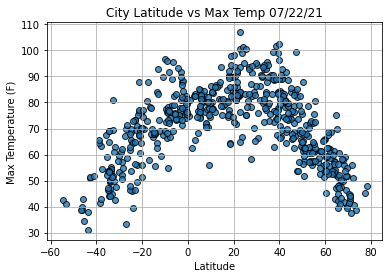

In [18]:
#import time module 
import time 

#build the scatter plot for latitude vs max temp 
plt.scatter(lats, max_temps, 
           edgecolor = "black", 
           linewidths = 1, 
           marker = "o", 
           alpha = 0.8, 
           label = "Cities")

#incorporate the other graph properties 
plt.title("City Latitude vs Max Temp " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

#save the figure 
plt.savefig("weather_data/Fig1.png")

#show plot 
plt.show()


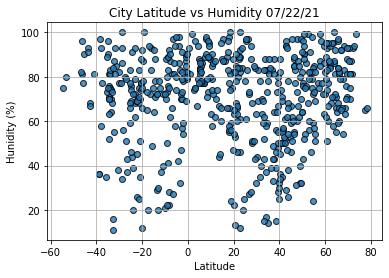

In [19]:
#build the scatter plot for latitude vs humidity 
plt.scatter(lats, humidity, 
           edgecolor = "black", 
           linewidths = 1, 
           marker = "o", 
           alpha = 0.8, 
           label = "Cities")

#incorporate the other graph properties 
plt.title("City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Hunidity (%)")
plt.xlabel("Latitude")
plt.grid()

#save the figure 
plt.savefig("weather_data/Fig2.png")

#show plot 
plt.show()


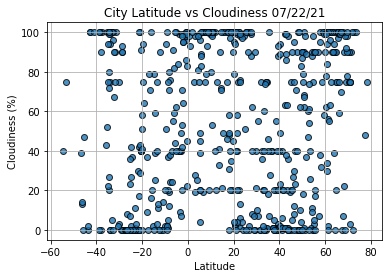

In [20]:
#build the scatter plot for latitude vs cloudiness 
plt.scatter(lats, cloudiness, 
           edgecolor = "black", 
           linewidths = 1, 
           marker = "o", 
           alpha = 0.8, 
           label = "Cities")

#incorporate the other graph properties 
plt.title("City Latitude vs Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

#save the figure 
plt.savefig("weather_data/Fig3.png")

#show plot 
plt.show()


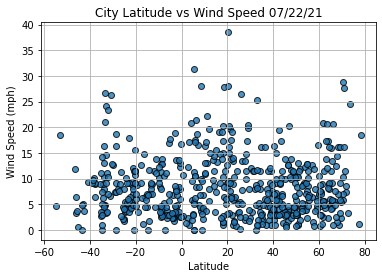

In [21]:
#build the scatter plot for latitude vs wind speed
plt.scatter(lats, wind_speed, 
           edgecolor = "black", 
           linewidths = 1, 
           marker = "o", 
           alpha = 0.8, 
           label = "Cities")

#incorporate the other graph properties 
plt.title("City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

#save the figure 
plt.savefig("weather_data/Fig4.png")

#show plot 
plt.show()

In [34]:
#import linregress
from scipy.stats import linregress

#create a function to create perform linear regression on the weather data 
#and plot a regression line and the equation with the data 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [35]:
#create a new dataframe from the current city_data dataframe using loc 
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Country                        US
Date          2021-07-22 19:29:28
Lat                       22.0752
Lng                      -159.319
Max Temp                    82.38
Humidity                       80
Cloudiness                     75
Wind Speed                    3.0
Name: 13, dtype: object

In [36]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

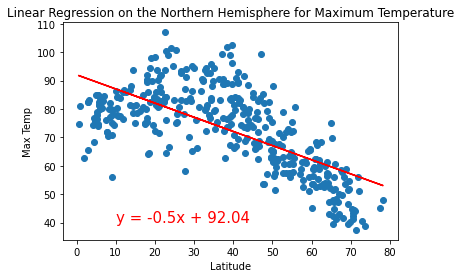

In [42]:
#linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Northern Hemisphere for Maximum Temperature", 
                      "Max Temp", (10, 40))

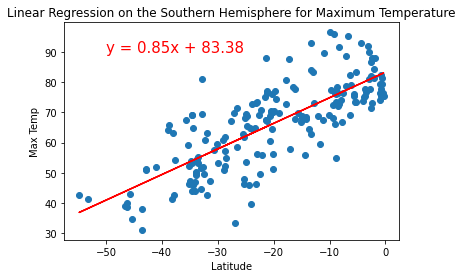

In [41]:
#linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#call the function 
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Southern Hemisphere for Maximum Temperature", 
                      "Max Temp", (-50, 90))

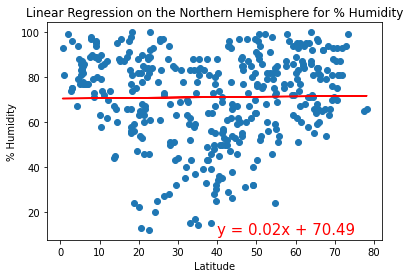

In [39]:
#linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (40,10))

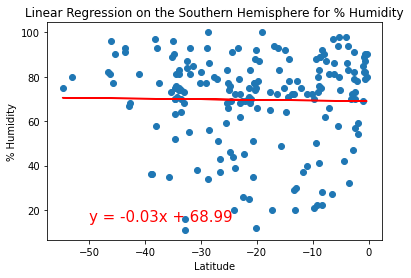

In [40]:
#linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-50,15))

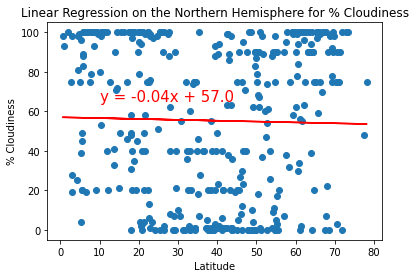

In [46]:
#linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (10,65))

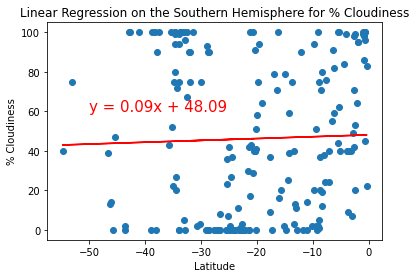

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

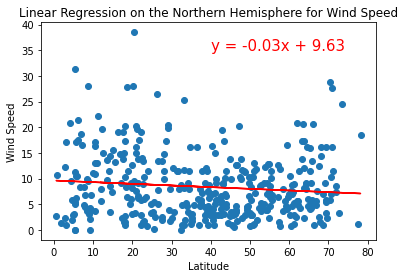

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

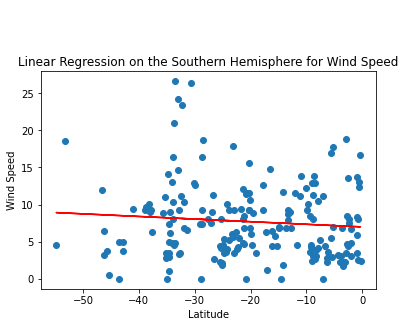

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))